In [43]:
from pomegranate import*

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kde
import json

In [45]:
from hmm_helpers import build_hmm
from helpers import WindowType

In [46]:
sns.set(color_codes=True)

In [49]:
ffile = "../"
hmm_file = ffile + "HMM_Model_0.json"
path = ffile 

In [50]:
# this is the model we trained
hmm = build_hmm(hmm_file)

# make sure that no updsates occur
#hmm.freeze()

Working with state:  GAP_STATE
Working with state:  STATE_0


KeyError: 'name'

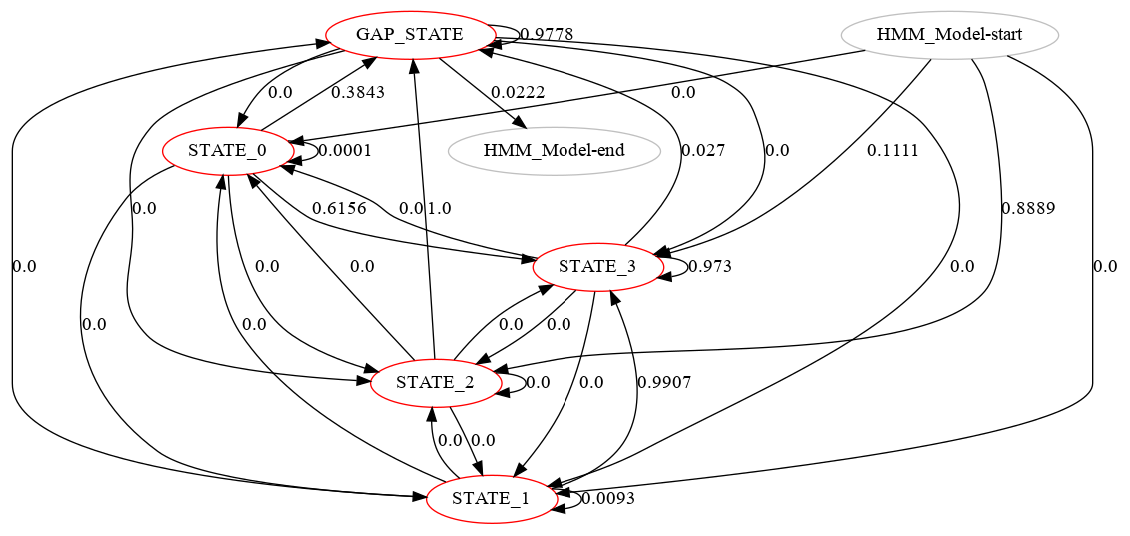

In [9]:
# visualize the model we just trained
plt.figure( figsize=(20,18) )
hmm.plot()
plt.show()

In [23]:
# load a sequence other than that we trained the HMM
from train import make_window_regions
from helpers import read_configuration_file

In [24]:
configuration=read_configuration_file("config.json")


In [32]:
configuration["regions"]["start"]=[1000000]
configuration["regions"]["end"]=[1500000]

In [33]:
regions = make_window_regions(configuration=configuration)

INFO: Window size: 200
INFO: Chromosome:  chr1
INFO: Regions used {'start': [1000000], 'end': [1500000]}
INFO: Start index: 1000000
INFO: End index:   1500000
INFO: Creating WGA Windows...
INFO: Reference file: b'/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna'
INFO: Alternative file: b'/scratch/spectre/a/ag568/m605_verysensitive_trim_sorted.bam' 
INFO: Not using quality threshold


INFO: Number of errors: 0
INFO: Number of adjusted: 0
INFO: Bam length: 431531
INFO: Extracting common bases


INFO: Estimated number of windows: 2157 
INFO: Number of WGA windows: 2504
INFO: Creating No WGA Windows...
INFO: Reference file: b'/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna'
INFO: Alternative file: b'/scratch/spectre/a/ag568/m585_verysensitive_trim_sorted.bam' 
INFO: Not using quality threshold


INFO: Number of errors: 0
INFO: Number of adjusted: 0
INFO: Bam length: 496058
INFO: Extracting common bases


INFO: Estimated number of windows: 2480 
INFO: Number of non-wga windows: 2501
INFO: Marking N  windows with: -999
INFO: Number of mixed windows: 2501
INFO: Number of windows after outlier removal: 2369


In [34]:
print("Number or regions: {0}".format(len(regions)))

Number or regions: 1


In [39]:
# create a sequence from region 0
sequence = regions[0].get_sequence(size=50, window_type=WindowType.BOTH)


In [40]:
print(sequence)

[(4.43, 6.35), (4.735, 9.775), (4.36, 14.785), (5.56, 13.805), (5.285, 13.58), (4.65, 15.67), (3.82, 13.1), (3.44, 12.325), (7.05, 8.925), (7.74, 11.3), (8.75, 14.185), (7.71, 9.625), (5.03, 7.415), (8.81, 13.51), (12.11, 11.265), (9.045, 16.85), (8.765, 15.775), (7.765, 11.815), (4.985, 9.3), (4.91, 13.43), (5.855, 14.12), (11.595, 9.87), (9.925, 10.985), (8.54, 12.475), (5.86, 17.025), (6.775, 15.55), (4.32, 18.135), (4.44, 9.655), (3.305, 11.115), (4.575, 12.825), (4.07, 15.2), (2.985, 14.525), (4.535, 16.495), (6.69, 15.33), (4.055, 11.045), (6.755, 15.22), (6.585, 16.76), (4.81, 11.39), (7.445, 13.915), (5.18, 17.97), (5.715, 16.345), (5.545, 17.79), (5.38, 13.555), (3.585, 18.45), (4.8, 17.26), (3.315, 12.365), (5.21, 16.54), (7.31, 10.415), (7.065, 15.72), (9.03, 16.2)]


Run the Viterbi algorithm on the sequence given the model. This finds the ML path of hidden states given the sequence. Returns a tuple of the log probability of the ML path, or (-inf, None) if the sequence is impossible under the model. 
If a path is returned, it is a list of tuples of the form (sequence index, state object).

In [41]:
viterbi_path=hmm.viterbi(sequence)

In [42]:
print("Log-probability of ML Viterbi path: ", viterbi_path[0])

if viterbi_path[1] is not None:
    print("Viterbi path length: ", len(viterbi_path[1]))

    for item in range(len(sequence)):
        print("sequnce item: {0} state {1}".format(sequence[item], viterbi_path[1][item][1].name))


Log-probability of ML Viterbi path:  -inf


In [19]:
n_seqs=100

In [20]:

sequences = regions[0].get_region_as_sequences(size=20, window_type=WindowType.BOTH, n_seqs=n_seqs)

# make sure we have as many sequences we requested
assert len(sequences) == n_seqs, "Invalid number of sequences"

In [21]:
for seq in sequences:
    
    #print(seq)
    
    viterbi_path=hmm.viterbi(sequence)
    
    print("Log-probability of ML Viterbi path: ", viterbi_path[0])

    if viterbi_path[1] is not None:
        print("Viterbi path length: ", len(viterbi_path[1]))

        for item in range(len(sequence)):
            print("sequnce item: {0} state {1}".format(sequence[item], viterbi_path[1][item][1].name))

Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path

In [31]:
p_d_given_m = hmm.log_probability(sequence=sequence)
print("P(D|M): ", p_d_given_m)
print(hmm.predict_proba(sequence))

P(D|M):  -inf
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
